In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import boxcox
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import math

In [125]:
df_MSACSR = pd.read_csv("https://raw.githubusercontent.com/Shreyashchawda12/Datasets/main/MSACSR.csv")
df_UNRATE = pd.read_csv("https://raw.githubusercontent.com/Shreyashchawda12/Datasets/main/UNRATE.csv")
df_MORTGAGE30US = pd.read_csv("https://raw.githubusercontent.com/Shreyashchawda12/Datasets/main/MORTGAGE30US.csv")
df_DSPIC96 = pd.read_csv("https://raw.githubusercontent.com/Shreyashchawda12/Datasets/main/DSPIC96.csv")
df_PMSAVE = pd.read_csv("https://raw.githubusercontent.com/Shreyashchawda12/Datasets/main/PMSAVE.csv")
df_PCE = pd.read_csv("https://raw.githubusercontent.com/Shreyashchawda12/Datasets/main/PCE.csv")
df_USALORSGPNOSTSAM = pd.read_csv("https://raw.githubusercontent.com/Shreyashchawda12/Datasets/main/USALORSGPNOSTSAM.csv")
df_HPI = pd.read_csv("https://raw.githubusercontent.com/Shreyashchawda12/Datasets/main/CSUSHPISA.csv")

In [126]:
df_DRSFRMACBS = pd.read_csv("https://raw.githubusercontent.com/Shreyashchawda12/Datasets/main/DRSFRMACBS.csv")
df_GDPC1 = pd.read_csv("https://raw.githubusercontent.com/Shreyashchawda12/Datasets/main/GDPC1.csv")
df = pd.read_csv('https://raw.githubusercontent.com/Shreyashchawda12/Datasets/main/US_dataset.csv')


In [127]:
def date_index(df):
  df['DATE'] = pd.to_datetime(df['DATE'])
  df = df.set_index('DATE',inplace=True)
  return df

In [128]:
db_name =   [df_MSACSR,df_UNRATE,df_MORTGAGE30US,df_DSPIC96,df_PMSAVE,df_PCE,df_USALORSGPNOSTSAM,df_DRSFRMACBS,
                         df_GDPC1,df_HPI,df]

In [129]:
for db in db_name:
  db = date_index(db)

In [130]:
df = df.drop(columns=['Unnamed: 0'])

In [131]:
df

,MSACSR,UNRATE,MAVR,DSPI,PMSAVE,PCE,OECD_GDP,RGDP,DR,HPI
DATE,,,,,,,,,,
2002-01-01,4.2,5.7,6.9975,9951.9,451.1,7184.6,99.121440,13394.910,2.24,117.143
2002-02-01,4.0,5.7,6.8925,9966.6,437.5,7225.2,99.117811,13394.910,2.24,117.845
2002-03-01,4.1,5.7,7.0140,9973.3,448.6,7243.4,99.111637,13394.910,2.24,118.686
2002-04-01,4.3,5.9,6.9850,10007.2,440.7,7312.5,99.093106,13477.356,2.16,119.610
2002-05-01,4.0,5.8,6.8060,10047.9,504.4,7288.9,99.055417,13477.356,2.16,120.724
...,...,...,...,...,...,...,...,...,...,...
2023-01-01,8.1,3.4,6.2725,15504.7,785.3,18076.6,99.994540,20282.760,1.74,296.601
2023-02-01,8.4,3.6,6.2575,15545.3,836.1,18123.9,100.014996,20282.760,1.74,296.958
2023-03-01,8.1,3.5,6.5440,15598.6,901.2,18138.7,100.031746,20282.760,1.74,298.210


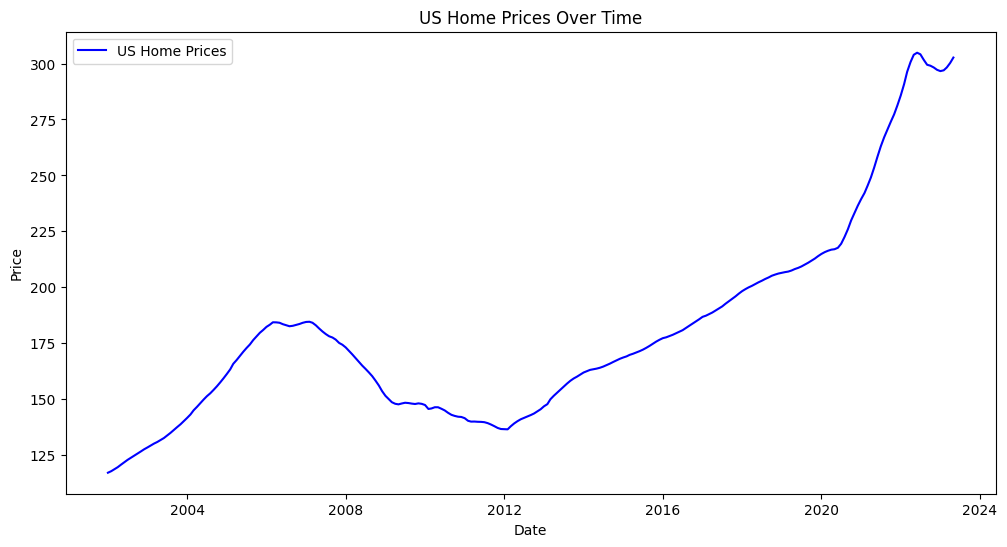

In [132]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['HPI'], label='US Home Prices', color='blue')
plt.title('US Home Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show()


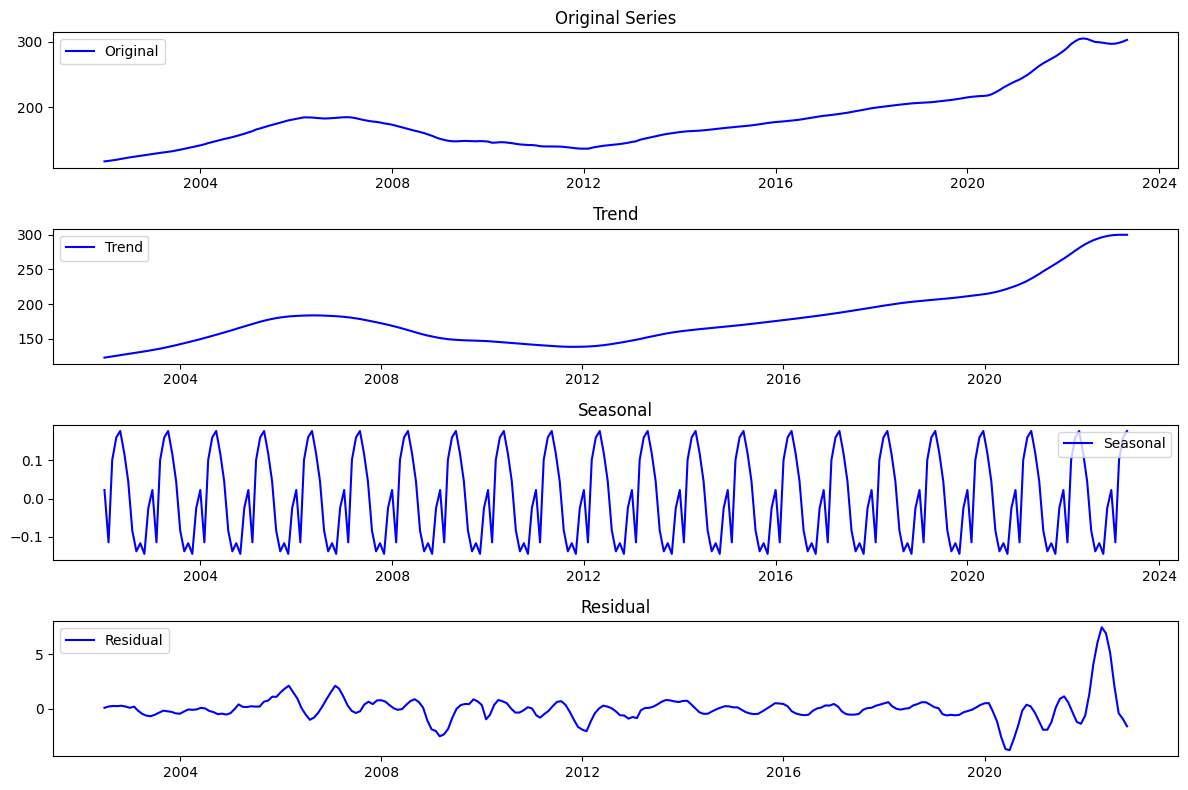

In [133]:
decomposition = sm.tsa.seasonal_decompose(df['HPI'], model='additive', period=12)  # Assuming monthly data

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df.index, df['HPI'], label='Original', color='blue')
plt.legend(loc='best')
plt.title('Original Series')

plt.subplot(412)
plt.plot(df.index, trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.title('Trend')

plt.subplot(413)
plt.plot(df.index, seasonal, label='Seasonal', color='blue')
plt.legend(loc='best')
plt.title('Seasonal')

plt.subplot(414)
plt.plot(df.index, residual, label='Residual', color='blue')
plt.legend(loc='best')
plt.title('Residual')

plt.tight_layout()


In [134]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['HPI'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])


ADF Statistic: 0.3439480261314988
p-value: 0.9792733497992776
Critical Values: {'1%': -3.457664132155201, '5%': -2.8735585105960224, '10%': -2.5731749894132916}


# Box-Cox Transformation

In [135]:

# Apply Box-Cox transformation
df['BoxCox_US_Home_Price'], _ = boxcox(df['HPI'])

# Check stationarity on the Box-Cox transformed data
result_boxcox = adfuller(df['BoxCox_US_Home_Price'].dropna())
print('ADF Statistic (Box-Cox Transformed Data):', result_boxcox[0])
print('p-value (Box-Cox Transformed Data):', result_boxcox[1])
print('Critical Values (Box-Cox Transformed Data):', result_boxcox[4])


ADF Statistic (Box-Cox Transformed Data): -1.2943356411669034
p-value (Box-Cox Transformed Data): 0.6317597638459063
Critical Values (Box-Cox Transformed Data): {'1%': -3.457664132155201, '5%': -2.8735585105960224, '10%': -2.5731749894132916}


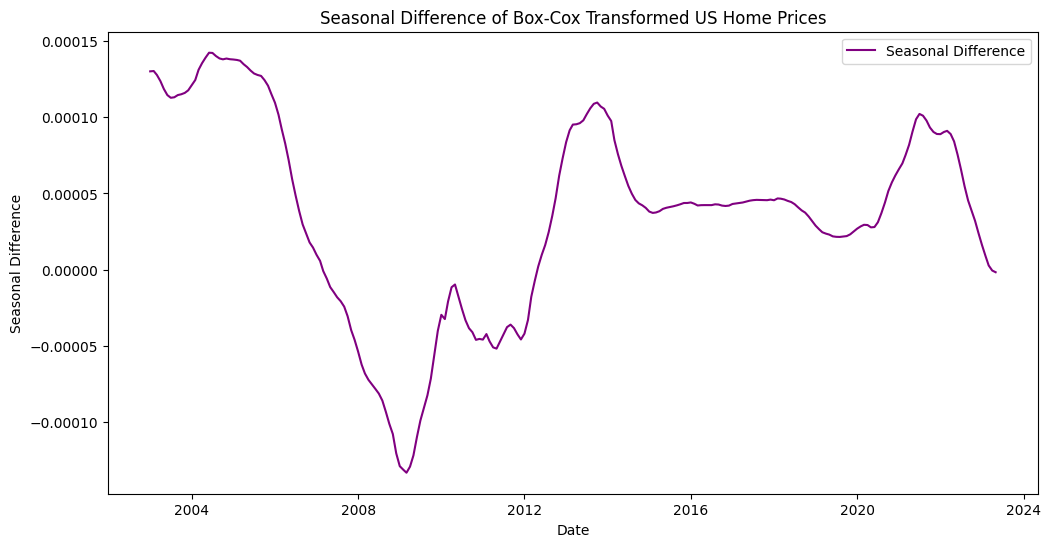

In [136]:
# Seasonal differencing (assuming monthly data with a seasonal period of 12 months)
df['Seasonal_Difference'] = df['BoxCox_US_Home_Price'] - df['BoxCox_US_Home_Price'].shift(12)

# Plot the seasonally differenced data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Seasonal_Difference'], label='Seasonal Difference', color='purple')
plt.title('Seasonal Difference of Box-Cox Transformed US Home Prices')
plt.xlabel('Date')
plt.ylabel('Seasonal Difference')
plt.legend(loc='best')
plt.show()

In [137]:
result_seasonal_diff = adfuller(df['Seasonal_Difference'].dropna())
print('ADF Statistic (Seasonal Differenced Data):', result_seasonal_diff[0])
print('p-value (Seasonal Differenced Data):', result_seasonal_diff[1])
print('Critical Values (Seasonal Differenced Data):', result_seasonal_diff[4])

ADF Statistic (Seasonal Differenced Data): -2.746795731525832
p-value (Seasonal Differenced Data): 0.06628466674531988
Critical Values (Seasonal Differenced Data): {'1%': -3.4593607492757554, '5%': -2.8743015807562924, '10%': -2.5735714042782396}


# Log Transformation

In [138]:
# Second-order differencing
df['Second_Order_Difference'] = df['Seasonal_Difference'] - df['Seasonal_Difference'].shift(1)

# Check stationarity on the second-order differenced data
result_second_diff = adfuller(df['Second_Order_Difference'].dropna())
print('ADF Statistic (Second-Order Differenced Data):', result_second_diff[0])
print('p-value (Second-Order Differenced Data):', result_second_diff[1])
print('Critical Values (Second-Order Differenced Data):', result_second_diff[4])


ADF Statistic (Second-Order Differenced Data): -2.9996613051835865
p-value (Second-Order Differenced Data): 0.03492604221816508
Critical Values (Second-Order Differenced Data): {'1%': -3.4593607492757554, '5%': -2.8743015807562924, '10%': -2.5735714042782396}


# Modeling and Forecasting

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Root Mean Squared Error (RMSE): 0.00012447557992604239


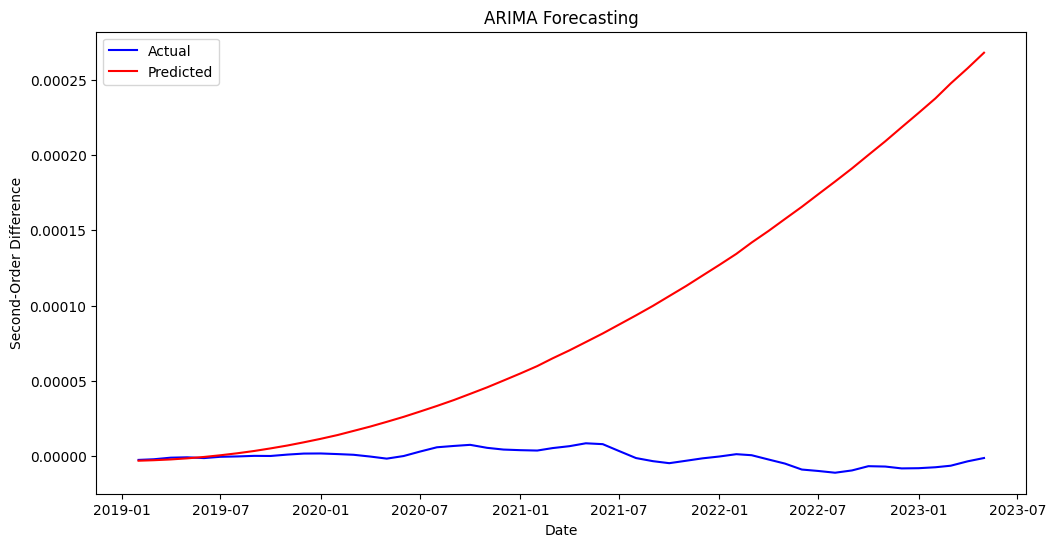

In [148]:

# Fit ARIMA model
p, d, q = 1, 3, 1
model = ARIMA(train_data, order=(p, d, q))
model_fit = model.fit()

# Forecast future values
forecast_periods = len(test_data)
forecast = model_fit.forecast(steps=forecast_periods)

# Calculate RMSE
mse = mean_squared_error(test_data, forecast)
rmse = math.sqrt(mse)

print('Root Mean Squared Error (RMSE):', rmse)

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(df.index[train_size:], test_data, label='Actual', color='blue')
plt.plot(df.index[train_size:], forecast, label='Predicted', color='red')
plt.title('ARIMA Forecasting')
plt.xlabel('Date')
plt.ylabel('Second-Order Difference')
plt.legend(loc='best')
plt.show()



DATE
2002-01-01         NaN
2002-02-01         NaN
2002-03-01         NaN
2002-04-01         NaN
2002-05-01         NaN
                ...   
2018-09-01   -0.000002
2018-10-01   -0.000001
2018-11-01   -0.000003
2018-12-01   -0.000003
2019-01-01   -0.000003
Name: Second_Order_Difference, Length: 205, dtype: float64